Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning.

Importamos las librerías necesarias.

In [1]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Para este ejercicio trabajaremos con el dataset de Fashion MNIST.

También se utilizara la función de train_test_split para facilitar el preprocesamiento de datos.

In [53]:
from sklearn.model_selection import train_test_split

Importamos los datos.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

Y luego vamos a separar los datos entre train y test.

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Hacemos otro split sobre los datos de train para obtener datos de validación

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

También vamos a escalar los datos de entrada.

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

Asignamos nombres a las clases

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Vamos a crear una red CNN con la API `Sequential()` de keras.

In [8]:
model = keras.models.Sequential()

Primero añadimos una capa de 64 filtros de 7 x 7, además configuramos el input_shape=[28, 28, 1] porque las imagenes son de 28 x 28 píxeles en escala de grises.

In [9]:
model.add(keras.layers.Conv2D(64, 7, activation="relu", padding="same",
input_shape=[28, 28, 1]))

Después, añadimos una capa de MaxPooling2D con un pool size de 2 para dividir cada dimensión espacial entre 2.

In [10]:
model.add(keras.layers.MaxPooling2D(2))

Y seguimos repitiendo el patrón anteriro de añadir capas relu seguidas por una capa MaxPooling2D, sólo que duplicando la cantidad de filtros hasta llegar a 256.

In [11]:
model.add(keras.layers.Conv2D(128, 3, activation="relu", padding="same"))

In [12]:
model.add(keras.layers.Conv2D(128, 3, activation="relu", padding="same"))

In [13]:
model.add(keras.layers.MaxPooling2D(2))

In [14]:
model.add(keras.layers.Conv2D(256, 3, activation="relu", padding="same"))

In [15]:
model.add(keras.layers.Conv2D(256, 3, activation="relu", padding="same"))

In [16]:
model.add(keras.layers.MaxPooling2D(2))

Finalmente, añadimos una red de dos capas ocultas y una capa de salida, debemos hacer un flattening ya que la red recibe un array de una sola dimensión como entrada. Igualmente, añadimos dos capas dropout con una tasa de 50% cada una para reducir las posibilidades de overfitting.

In [17]:
model.add(keras.layers.Flatten())

In [18]:
model.add(keras.layers.Dense(128, activation="relu"))

In [19]:
model.add(keras.layers.Dropout(0.5))

In [20]:
model.add(keras.layers.Dense(64, activation="relu"))

In [21]:
model.add(keras.layers.Dropout(0.5))

In [22]:
model.add(keras.layers.Dense(10, activation="softmax"))

Aquí podemos ver un resumen sobre las capas que conforman nuestra red.

In [23]:
model.layers

Finalmente, pasamos a compilar nuestro modelol

In [24]:
model.compile(loss="sparse_categorical_crossentropy", 
optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Y entrenamos al modelo haciendo uso de su función fit

In [25]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1407/1407 [==============================] - 682s 484ms/step - loss: 1.5502 - accuracy: 0.4277 - val_loss: 0.8176 - val_accuracy: 0.7090
Epoch 2/5
1407/1407 [==============================] - 682s 484ms/step - loss: 0.9100 - accuracy: 0.6619 - val_loss: 0.6449 - val_accuracy: 0.7527
Epoch 3/5
1407/1407 [==============================] - 679s 483ms/step - loss: 0.7402 - accuracy: 0.7283 - val_loss: 0.5561 - val_accuracy: 0.8043
Epoch 4/5
1407/1407 [==============================] - 685s 487ms/step - loss: 0.6429 - accuracy: 0.7691 - val_loss: 0.4660 - val_accuracy: 0.8319
Epoch 5/5
1407/1407 [==============================] - 683s 485ms/step - loss: 0.5824 - accuracy: 0.7959 - val_loss: 0.4350 - val_accuracy: 0.8407


Importamos matplotlib y pandas para gráficar el entrenamiento.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

Y gráficamos.

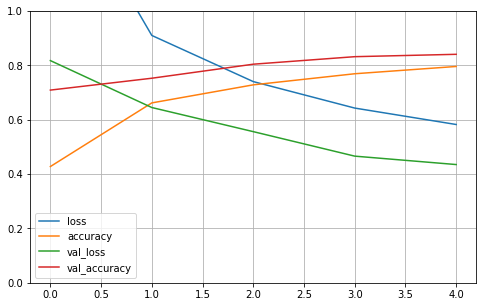

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Como se puede ver la tendencia del accuracy es incremental y la de loss decremental, por lo cual podemos afirmar que este modelo es adecuado. Obviamente, podríamos obtener mayor accuracy y menor loss si le damos más epochs de entrenamiento al modelo.

Pasaremos a evaluar el modelo con los datos de test.

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 35s 112ms/step - loss: 0.4640 - accuracy: 0.8297


[0.46403682231903076, 0.8296999931335449]

Como podemos ver se obtuvo un buen accuracy.
Ahora pasaremos a hacer predicciones con el modelo.

Para ello crearemos un dataset con las primeras 5 entradas del dataset de entrenamiento, con el fin de usar estos valores para hacer las predicciones.

In [34]:
X_new = X_test[:5]

Y predecimos a qué clases pertenecen los valores.

In [39]:
y_proba = model.predict(X_new)
predictions = y_proba.round(2)
predictions

1/1 [==============================] - 0s 37ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.07, 0.  , 0.9 ],
       [0.  , 0.  , 0.93, 0.  , 0.02, 0.  , 0.06, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.  , 0.15, 0.02, 0.05, 0.  , 0.68, 0.  , 0.  , 0.  ]],
      dtype=float32)

Luego obtenemos la clase con la mayor probabilidad por cada predicción.

In [43]:
predClasses = []
for prediction in predictions:
  predClasses.append(prediction.argmax(axis=0))

predClasses

[9, 2, 1, 1, 6]

Y comparamos con las clases reales de los datos usados para hacer las predicciones.

In [45]:
y_true = y_test[:5]
y_true

array([9, 2, 1, 1, 6], dtype=uint8)

In [51]:
np.array(class_names)[predClasses]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [52]:
np.array(class_names)[y_true]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

Podemos ver que se predijo correctamente la clase de los valores de entrada.